In [2]:
import pandas as pd
from scipy.stats import mannwhitneyu, f_oneway

# Load the Wine Dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
column_names = ["Class", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash",
                "Magnesium", "Total phenols", "Flavanoids", "Nonflavanoid phenols",
                "Proanthocyanins", "Color intensity", "Hue", "OD280/OD315 of diluted wines",
                "Proline"]
wine_data = pd.read_csv(url, header=None, names=column_names)

# Display the first few rows of the dataset
print("First few rows of the Wine Dataset:")
print(wine_data.head())

# Nonparametric Analysis(Mann-Whitney U test)
class_1_alcohol = wine_data[wine_data['Class'] == 1]['Alcohol']
class_2_alcohol = wine_data[wine_data['Class'] == 2]['Alcohol']
u_statistic, p_value = mannwhitneyu(class_1_alcohol, class_2_alcohol)
print("\nNonparametric Analysis:")
print("Mann-Whitney U-statistic (Class 1 vs. Class 2):", u_statistic)
print("Mann-Whitney p-value (Class 1 vs. Class 2):", p_value)

# Parametric Analysis(One-way ANOVA)
class_1_alcohol = wine_data[wine_data['Class'] == 1]['Alcohol']
class_2_alcohol = wine_data[wine_data['Class'] == 2]['Alcohol']
class_3_alcohol = wine_data[wine_data['Class'] == 3]['Alcohol']
f_statistic, p_value = f_oneway(class_1_alcohol, class_2_alcohol, class_3_alcohol)
print("\nParametric Analysis:")
print("One-way ANOVA F-statistic (Alcohol):", f_statistic)
print("One-way ANOVA p-value (Alcohol):", p_value)



First few rows of the Wine Dataset:
   Class  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             5.64  1.04                          3.92  

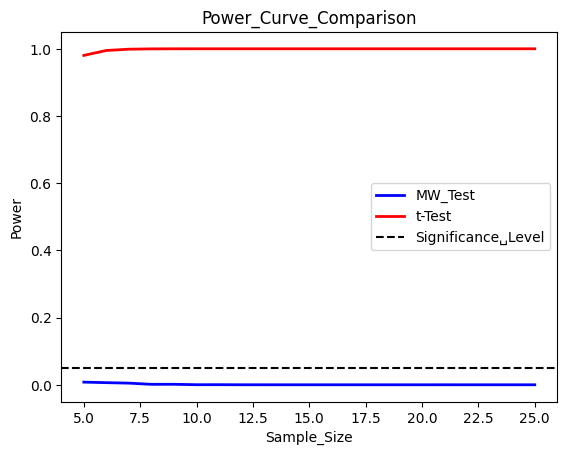

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
from statsmodels.stats.power import TTestIndPower
Class_a = class_1_alcohol
Class_b = class_2_alcohol
alpha = 0.05
sample_sizes = np.arange(5, 26)
power_mw = [mannwhitneyu(np.random.choice(Class_a, size=n), np.random.choice(Class_b, size=n))[1] for n in sample_sizes]
effect_size = np.abs(Class_a.mean() - Class_b.mean()) / np.sqrt((Class_a.var() + Class_b.var()) / 2)
ttest_power = TTestIndPower()
power_t = [ttest_power.solve_power(effect_size=effect_size, nobs1=n, alpha=alpha, alternative='two-sided') for n in sample_sizes]
plt.plot(sample_sizes, power_mw, color='blue', label='MW_Test',linewidth=2)
plt.plot(sample_sizes, power_t, color='red', label='t-Test',linewidth=2)
plt.xlabel('Sample_Size')
plt.ylabel('Power')
plt.title('Power_Curve_Comparison')
plt.axhline(alpha, color='black', linestyle='--', label='Significance␣Level')
plt.legend()
plt.show()

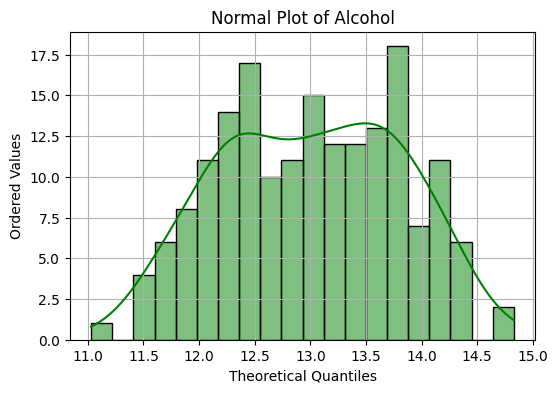

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Load the Wine Dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
column_names = ["Class", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash",
                "Magnesium", "Total phenols", "Flavanoids", "Nonflavanoid phenols",
                "Proanthocyanins", "Color intensity", "Hue", "OD280/OD315 of diluted wines",
                "Proline"]
df = pd.read_csv(url, header=None, names=column_names)

# Extract alcohol values for plotting
alcohol_values = df['Alcohol']
plt.figure(figsize=(6, 4))
sns.histplot(df['Alcohol'], kde=True, color='green', bins=20)
plt.title('Normal Plot of Alcohol')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.grid(True)
plt.show()
